In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# Step 2: Create dataset
data = {
    "text": [
        "Python is widely used for AI and data science",
        "Functions and loops are key features in Python",
        "Machine learning uses algorithms to learn from data",
        "Neural networks are part of deep learning",
        "Cloud computing provides resources over the internet",
        "AWS and Azure are popular cloud providers",
        "Blockchain is used in cryptocurrencies like Bitcoin",
        "Smart contracts run on blockchain networks"
    ],
    "label": [
        "Python",
        "Python",
        "Machine Learning",
        "Machine Learning",
        "Cloud",
        "Cloud",
        "Blockchain",
        "Blockchain"
    ]
}

In [3]:
df = pd.DataFrame(data)
print(df)

                                                text             label
0      Python is widely used for AI and data science            Python
1     Functions and loops are key features in Python            Python
2  Machine learning uses algorithms to learn from...  Machine Learning
3          Neural networks are part of deep learning  Machine Learning
4  Cloud computing provides resources over the in...             Cloud
5          AWS and Azure are popular cloud providers             Cloud
6  Blockchain is used in cryptocurrencies like Bi...        Blockchain
7         Smart contracts run on blockchain networks        Blockchain


In [4]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.25, random_state=42)

In [5]:
# Step 4: Vectorize text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
# Step 5: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [7]:
# Step 6: Evaluate
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0

Classification Report:
                   precision    recall  f1-score   support

           Cloud       0.00      0.00      0.00       1.0
Machine Learning       0.00      0.00      0.00       0.0
          Python       0.00      0.00      0.00       1.0

        accuracy                           0.00       2.0
       macro avg       0.00      0.00      0.00       2.0
    weighted avg       0.00      0.00      0.00       2.0



C:\Users\sbhar\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sbhar\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sbhar\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

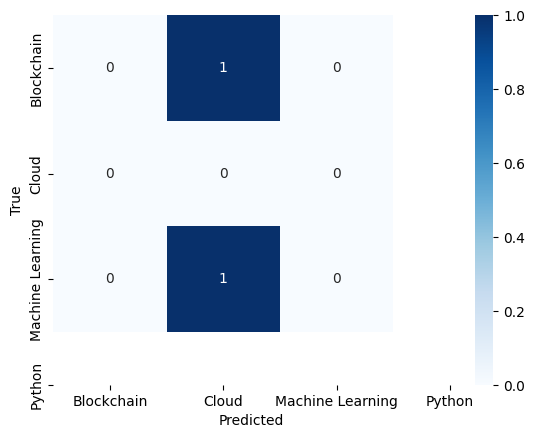

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [9]:
# Step 7: Save model and vectorizer
import os
os.makedirs("saved_model", exist_ok=True)
joblib.dump(model, "saved_model/text_classifier.pkl")
joblib.dump(vectorizer, "saved_model/vectorizer.pkl")

print("✅ Model and vectorizer saved in 'saved_model/' folder")

✅ Model and vectorizer saved in 'saved_model/' folder
